**Tarea en Clase**

Aplica algún método de filtro a tus datos mediante el uso de SelectKBest.

In [1]:
# Leer dataframe con datos
import pandas as pd
import numpy as np
df = pd.read_csv('datos_proc2.csv')

In [19]:
# Se emplea SlectKBest mediante regresión F.
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression

# Variables predictivas
X = df.drop('CO2(g/km)', axis=1)

# Variable objetivo
y = df['CO2(g/km)']

selector = SelectKBest(f_regression, k=15)
X_new = selector.fit_transform(X, y)


In [20]:
# Variables en modelo inicial
X.columns.values

array(['Modelo', 'Cilindros', 'Potencia (HP)', 'Tamaño (L)',
       'R. Ciudad (km/l)', 'R. Carr. (km/l)', 'R. Comb. (km/l)',
       'R. Ajust. (km/l)', 'NOx (g/1000km)', 'Calificación Gas Ef. Inv.',
       'Hibrido', 'Marca_Mean_Encoded', 'Submarca_Mean_Encoded',
       'Versión_Mean_Encoded', 'Trans._Mean_Encoded',
       'Comb._Mean_Encoded', 'Categoría_Mean_Encoded'], dtype=object)

In [21]:
# Variables seleccionadas con F Regression
X.columns.values[selector.get_support()]

array(['Modelo', 'Cilindros', 'Potencia (HP)', 'Tamaño (L)',
       'R. Ciudad (km/l)', 'R. Carr. (km/l)', 'R. Comb. (km/l)',
       'R. Ajust. (km/l)', 'Calificación Gas Ef. Inv.', 'Hibrido',
       'Marca_Mean_Encoded', 'Submarca_Mean_Encoded',
       'Versión_Mean_Encoded', 'Trans._Mean_Encoded',
       'Categoría_Mean_Encoded'], dtype=object)

Las variables removidas fueron NOx (g/1000km) y Comb._Mean_Encoded

**Tarea**

- Aplica los modelos de selección de características cuidando los supuestos de cada modelo

- Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

- Con base en tu investigación, determina las características más relevantes de tu conjunto de datos

- Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

In [12]:
# Aplicación de ANOVA de valor F

import matplotlib.pyplot as plt
f_value = f_regression(X, y)
# Regresa arreglo de estadístico F y valor p
f_value

(array([3.58414072e+02, 8.17152450e+03, 5.47419013e+03, 1.06044739e+04,
        1.96436646e+04, 2.12899626e+04, 2.95889586e+04, 2.95985983e+04,
        1.95863953e+00, 5.76075662e+04, 5.63006166e+01, 2.95149166e+03,
        2.36601599e+04, 4.26766201e+05, 1.03563943e+03, 1.68741141e-01,
        1.72887731e+03]),
 array([4.95456819e-077, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.61726338e-001, 0.00000000e+000, 7.42352508e-014, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 4.12894255e-205, 6.81252165e-001,
        4.50587869e-321]))

In [13]:
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(X.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(X.columns[i])
    else:
        not_pass_test.append(X.columns[i])

Modelo 4.954568194225837e-77
Cilindros 0.0
Potencia (HP) 0.0
Tamaño (L) 0.0
R. Ciudad (km/l) 0.0
R. Carr. (km/l) 0.0
R. Comb. (km/l) 0.0
R. Ajust. (km/l) 0.0
NOx (g/1000km) 0.16172633776380552
Calificación Gas Ef. Inv. 0.0
Hibrido 7.423525080071919e-14
Marca_Mean_Encoded 0.0
Submarca_Mean_Encoded 0.0
Versión_Mean_Encoded 0.0
Trans._Mean_Encoded 4.12894254703173e-205
Comb._Mean_Encoded 0.6812521646676388
Categoría_Mean_Encoded 4.506e-321


In [14]:
df_results = pd.DataFrame(f_value[0], index=X.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
Versión_Mean_Encoded,426766.200675
Calificación Gas Ef. Inv.,57607.566185
R. Ajust. (km/l),29598.598327
R. Comb. (km/l),29588.958620
Submarca_Mean_Encoded,23660.159859
R. Carr. (km/l),21289.962631
R. Ciudad (km/l),19643.664578
Tamaño (L),10604.473862
Cilindros,8171.524502
Potencia (HP),5474.190130


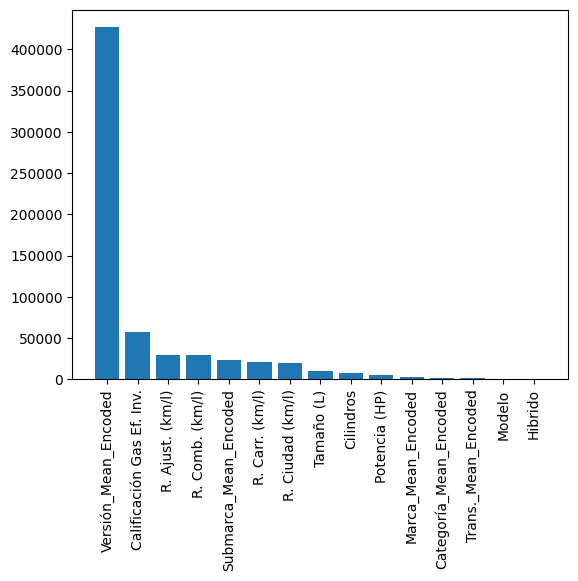

In [15]:
plt.figure()
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value)
plt.xticks(rotation=90)
plt.show()

Como se había comentado anteriormente en Tarea2, hay muchas categorías de Versión que no permite un análisis al casi tener cada vehículo su propia Versión.
Al correr riesgo de tener overfitting la sugerencia es remover el campo Versión_Mean_Encoded.

- Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)

- Con base en tu investigación, determina las características más relevantes de tu conjunto de datos

- Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

Acorde a una fuente consultada, se tiene el siguiente razonamiento para averiguar cuáles son las principales variables involucradas en la emisión de CO2:

" La cantidad de CO2 emitida, si atendemos únicamente al tipo del vehículo (y no a la forma de conducción), depende de la cantidad de energía necesaria para circular y de la eficiencia del motor. La cantidad de energía necesaria depende del peso del vehículo y de su potencia. Por tanto, a mayor potencia y mayor peso, mayor consumo de combustible y mayores emisiones de CO2."

Fuente:
[Emisiones de CO2 de los vehículos convencionales e híbridos](https://www.ecologistasenaccion.org/16233/2-emisiones-de-co2-de-los-vehiculos-convencionales-e-hibridos/)

De esta forma nos damos cuenta que Potencia (HP) es una de las variables que debemos de conservar. Aunque no contamos con el peso del vehículo en nuestra base, contamos con el campo de Categoría, la cual clasifica los vehículos en Autos de Lujo, Compactos, Subcompactos, Camionetas SUV, etc. El tipo de Categoría nos podría ayudar a tener una idea del tamaño del vehículo y por lo tanto del grupo de peso del vehículo al que pertenece. Por lo tanto, otra variable que debieramos conservar es Categoría_Mean_Encoded.